# Telco_Customer_Churn_Analysis

In [2]:
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt
import seaborn as sns 

#### Creating a dataframe 

In [3]:
df= pd.read_csv(r'C:\Users\Maithily Srivastava\OneDrive\Desktop\Customer churn.csv')
df.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


#### Replacing blanks with 0 in Total charges as tenure is 0 
#### Changed datatype of Total Charges from object to float 

In [5]:
df["TotalCharges"]=df["TotalCharges"].replace(" ","0")
df["TotalCharges"]=df["TotalCharges"].astype("float")

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


#### Inspecting null values 

In [7]:
df.isnull().sum()

customerID          0
gender              0
SeniorCitizen       0
Partner             0
Dependents          0
tenure              0
PhoneService        0
MultipleLines       0
InternetService     0
OnlineSecurity      0
OnlineBackup        0
DeviceProtection    0
TechSupport         0
StreamingTV         0
StreamingMovies     0
Contract            0
PaperlessBilling    0
PaymentMethod       0
MonthlyCharges      0
TotalCharges        0
Churn               0
dtype: int64

#### To do the descriptive analysis 

In [9]:
df.describe()

,SeniorCitizen,tenure,MonthlyCharges,TotalCharges
count,7043.000000,7043.000000,7043.000000,7043.000000
mean,0.162147,32.371149,64.761692,2279.734304
std,0.368612,24.559481,30.090047,2266.794470
min,0.000000,0.000000,18.250000,0.000000
25%,0.000000,9.000000,35.500000,398.550000
50%,0.000000,29.000000,70.350000,1394.550000
75%,0.000000,55.000000,89.850000,3786.600000
max,1.000000,72.000000,118.750000,8684.800000


#### Checking duplicate values 

In [11]:
df["customerID"].duplicated().sum()

0

#### Converting the values of Senior Citizen from 0 and 1 to Yes and No so as to make the analysis easy to understand 

In [10]:
def conv(value):
    if value == 1:
        return " Yes "
    else:
        return " No "
df["SeniorCitizen"] = df["SeniorCitizen"].apply(conv)

In [11]:
df.head(21)

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,No,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,No,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.50,No
2,3668-QPYBK,Male,No,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,No,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,No,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes
5,9305-CDSKC,Female,No,No,No,8,Yes,Yes,Fiber optic,No,...,Yes,No,Yes,Yes,Month-to-month,Yes,Electronic check,99.65,820.50,Yes
6,1452-KIOVK,Male,No,No,Yes,22,Yes,Yes,Fiber optic,No,...,No,No,Yes,No,Month-to-month,Yes,Credit card (automatic),89.10,1949.40,No
7,6713-OKOMC,Female,No,No,No,10,No,No phone service,DSL,Yes,...,No,No,No,No,Month-to-month,No,Mailed check,29.75,301.90,No
8,7892-POOKP,Female,No,Yes,No,28,Yes,Yes,Fiber optic,No,...,Yes,Yes,Yes,Yes,Month-to-month,Yes,Electronic check,104.80,3046.05,Yes
9,6388-TABGU,Male,No,No,Yes,62,Yes,No,DSL,Yes,...,No,No,No,No,One year,No,Bank transfer (automatic),56.15,3487.95,No


# Analysis of the data 

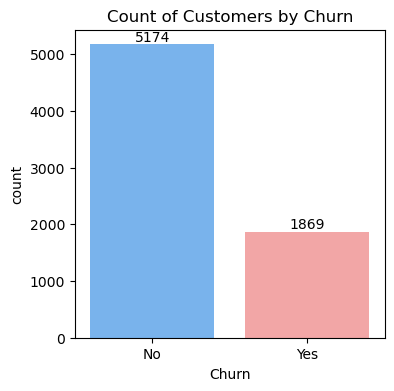

In [12]:
plt.figure(figsize = (4,4))
ax= sns.countplot(x="Churn",data= df,palette=["#66b3ff", "#ff9999"])
ax
ax.bar_label(ax.containers[0])
plt.title("Count of Customers by Churn")
plt.show()

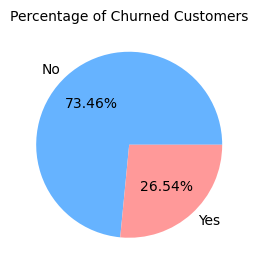

In [13]:
gb = df.groupby("Churn").agg({"Churn":"count"})
gb
plt.figure(figsize=(3,4))
plt.pie(gb["Churn"],labels = gb.index,autopct="%1.2f%%",colors=["#66b3ff", "#ff9999"])
plt.title("Percentage of Churned Customers",fontsize=10)
plt.show()

#### So from the given pie chart we can conclude that 26.54% people have churned out 
#### Now let's understand the reason behind it 

# • Exploring the data based on Gender 

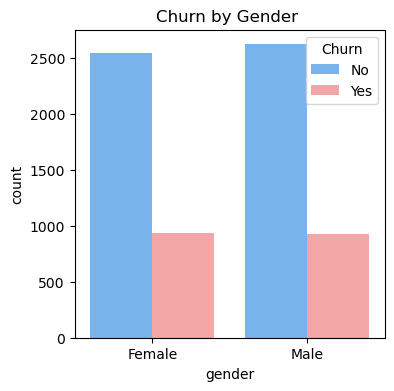

In [14]:
plt.figure(figsize = (4,4))
sns.countplot(x = "gender",data = df,hue = "Churn",palette=["#66b3ff", "#ff9999"])
plt.title("Churn by Gender ")
plt.show()

#### Here we can see that doesn't matter if customer is male or female equal amount of people are churning out
#### and it is not gender specific 

# • Exploring the data based on SeniorCitizen	

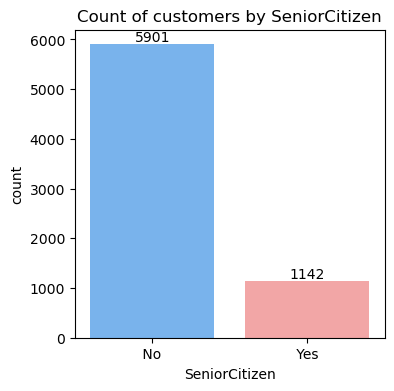

In [15]:
plt.figure(figsize = (4,4))
ax = sns.countplot(x = "SeniorCitizen",data = df,palette=["#66b3ff", "#ff9999"])
ax.bar_label(ax.containers[0])
plt.title("Count of customers by SeniorCitizen")
plt.show()

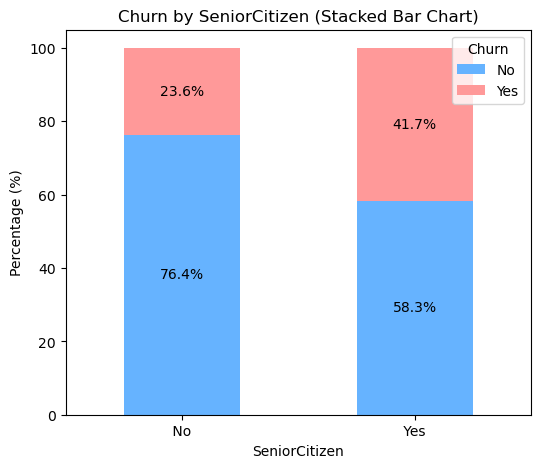

In [16]:
total_counts = df.groupby('SeniorCitizen')['Churn'].value_counts (normalize=True).unstack() * 100

# Plot
fig, ax = plt.subplots (figsize=(6,5)) 

#Plot the bars
total_counts.plot(kind='bar', stacked=True, ax=ax, color=['#66b3ff', '#ff9999']) 

# Add percentage Labels on the bars
for p in ax.patches:
 width, height = p.get_width(), p.get_height()
 x, y = p.get_xy()
 ax.text(x + width / 2, y + height / 2, f'{height:.1f}%', ha='center', va='center')

plt.title('Churn by SeniorCitizen (Stacked Bar Chart)')
plt.xlabel('SeniorCitizen')
plt.ylabel('Percentage (%)')
plt.xticks(rotation=0)
plt.legend(title='Churn', loc='upper right') 
plt.show()

#### Comparitively a greater percentage of SeniorCitizen have churned 

# • Exploring the data based on tenure

C:\Users\Maithily Srivastava\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


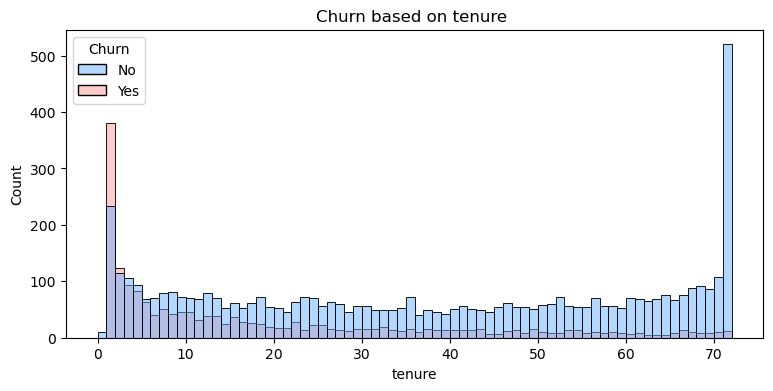

In [17]:
plt.figure(figsize = (9,4))
ax=sns.histplot(x = "tenure",data = df,bins = 72,hue = "Churn",palette=["#66b3ff", "#ff9999"])
plt.title("Churn based on tenure ")
plt.show()

#### We can see people have churned out who have used our services for 1 or 2 months and  
#### people who have used our services for long time have stayed with us 

#### This could be due to the type of contract so let's explore Contract 

# • Exploring the data based on Contract 

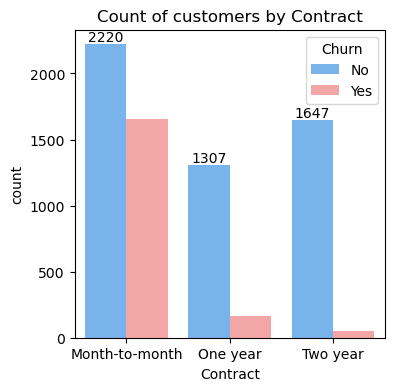

In [18]:
plt.figure(figsize = (4,4))
ax = sns.countplot(x = "Contract",data = df,palette=["#66b3ff", "#ff9999"],hue = "Churn")
ax.bar_label(ax.containers[0])
plt.title("Count of customers by Contract")
plt.show()

#### So we can see that people who are on month to month contract have churned out, 
#### to avoid this we can convince people what benefits they can get if they go for 1 or 2 year contract 

In [103]:
df.columns.values

array(['customerID', 'gender', 'SeniorCitizen', 'Partner', 'Dependents',
       'tenure', 'PhoneService', 'MultipleLines', 'InternetService',
       'OnlineSecurity', 'OnlineBackup', 'DeviceProtection',
       'TechSupport', 'StreamingTV', 'StreamingMovies', 'Contract',
       'PaperlessBilling', 'PaymentMethod', 'MonthlyCharges',
       'TotalCharges', 'Churn'], dtype=object)

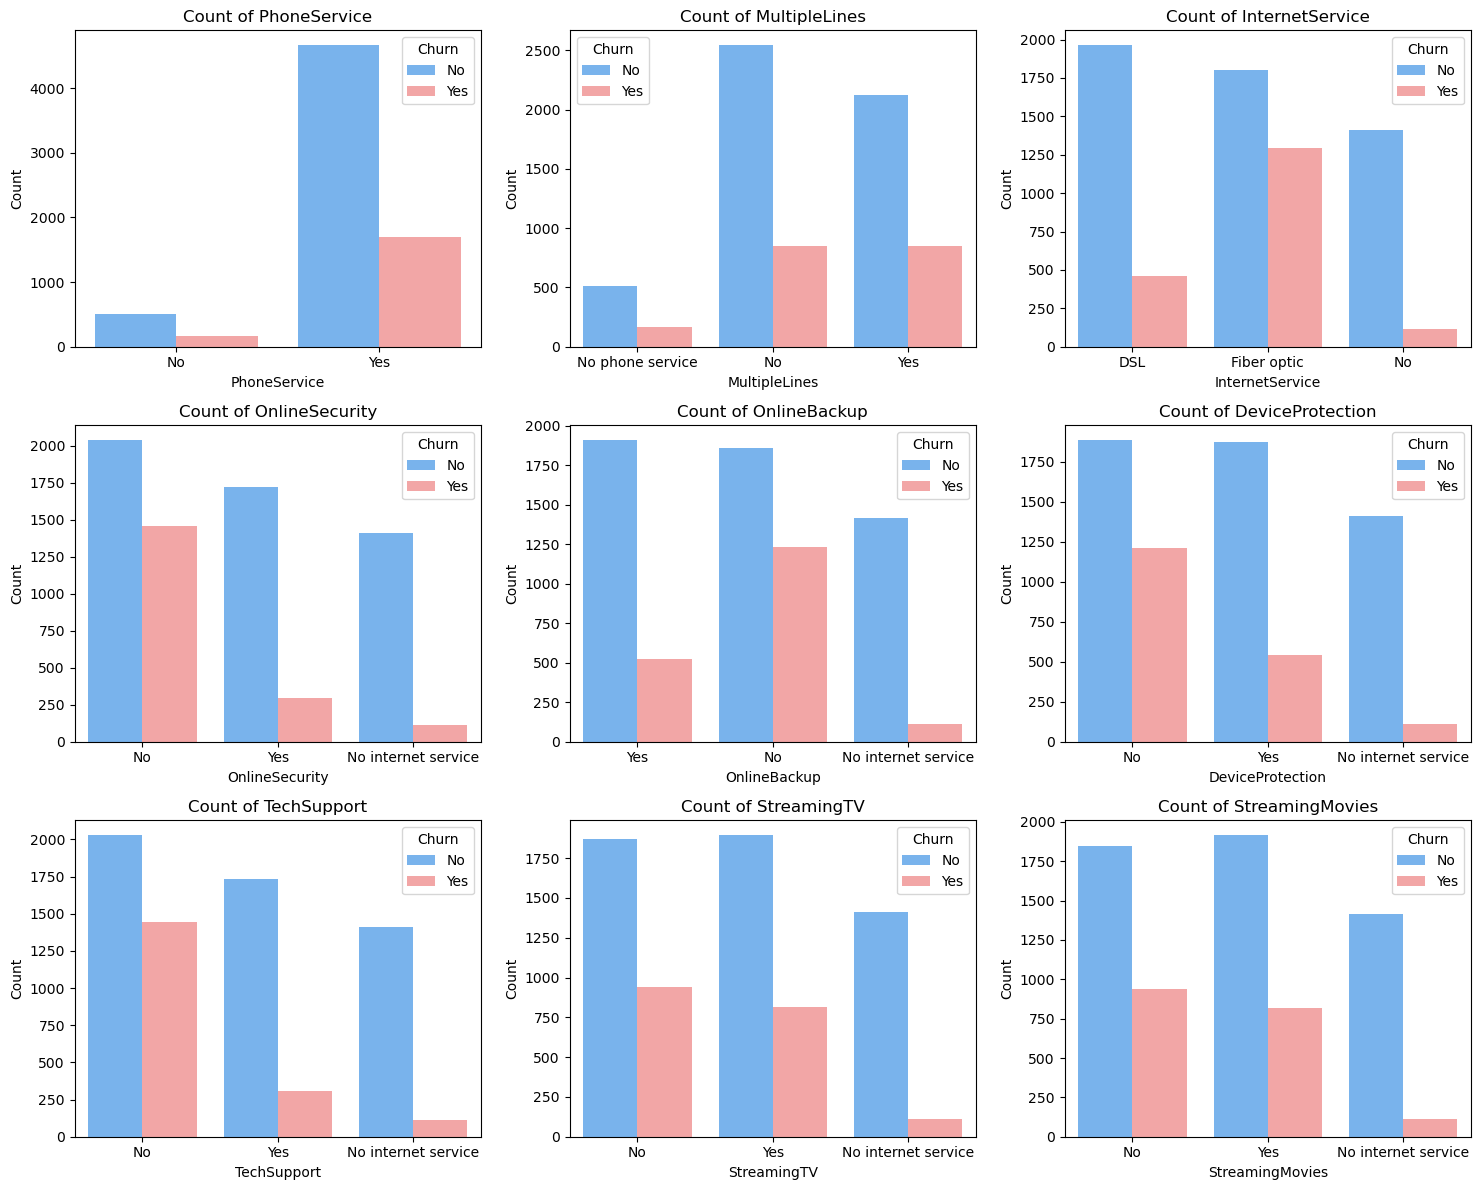

In [140]:
# List of columns to plot
columns = ['PhoneService', 'MultipleLines', 'InternetService', 'OnlineSecurity', 
           'OnlineBackup', 'DeviceProtection', 'TechSupport', 
           'StreamingTV', 'StreamingMovies']

# Number of rows and columns for the subplots grid
n_cols = 3  # Number of columns in the subplot grid
n_rows = (len(columns) + n_cols - 1) // n_cols  # Calculate the number of rows needed

# Create subplots
fig, axes = plt.subplots(n_rows, n_cols, figsize=(15, n_rows*4)) 


axes = axes.flatten()

# Plot each column's countplot in the respective subplot
for i, column in enumerate(columns):
    sns.countplot(x=column, data=df, ax=axes[i],palette=["#66b3ff", "#ff9999"],hue = "Churn")
    axes[i].set_title(f'Count of {column}')
    axes[i].set_xlabel(column) 
    axes[i].set_ylabel('Count')
    

# Remove any unused subplots if columns < n_rows * n_cols
for j in range(i + 1, n_rows * n_cols):
    fig.delaxes(axes[j])


plt.tight_layout() 
plt.show()


#### The majority of customers who do not churn tend to have services like PhoneService, InternetService (particularly DSL), Online Security 
#### and tech support enabled. 
#### For services like OnlineBackup, StreamingTV, device protection churn rates are noticeably higher when these services are not used or are unavailable. 
#### The charts emphasize the relationship between service usage and customer churn.

# • Exploring the data based on PaymentMethod

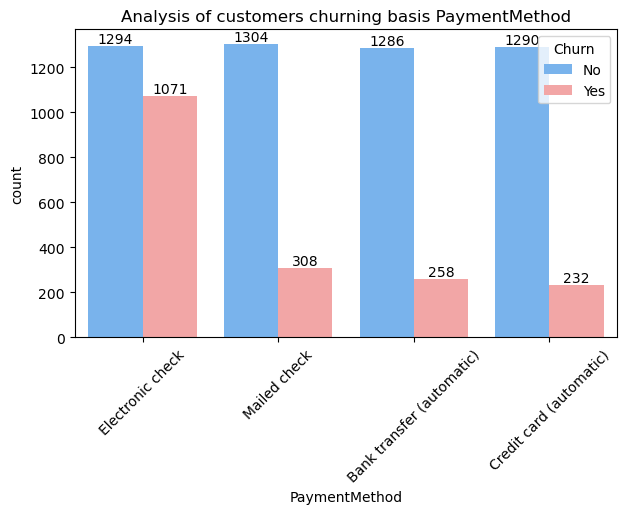

In [136]:
plt.figure(figsize= (7,4))
ax=sns.countplot(x = "PaymentMethod",data = df, hue = "Churn",palette=["#66b3ff", "#ff9999"])
ax.bar_label(ax.containers[0])
ax.bar_label(ax.containers[1])
plt.title("Analysis of customers churning basis PaymentMethod")
plt.xticks(rotation = 45)
plt.show()

#### Here we can conclude that cutomers using electronic check are more likely to churn than 
#### customers using mailed check / bank transfer(automatic )/ credit card(automatic )
